#### Random forest without feature engineering. Use grid search to tune hyperparameters. The accuracy turned out to be 0.80597

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv("train_lab6.csv", dtype={"Age": np.float64}, )
test  = pd.read_csv("test_lab6.csv", dtype={"Age": np.float64}, )

In [3]:
def normalize_data(titanic):
    
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
    titanic["Age"].mean()
    
    titanic.loc[titanic["Sex"] == "male", "Sex"] = 1
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 0
    
    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic

In [4]:
train_data = normalize_data(train)
test_data  = normalize_data(test)

In [5]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch","Fare", "Embarked"]

In [ ]:
Model = RandomForestClassifier(max_depth=5)
param_grid = {"n_estimators": np.arange(10,26), "max_features": [1,2,3,4,5,6,7]}
n = len(train)
#cv=cross_validation.ShuffleSplit(n, n_iter=10, test_size=0.2)
clf = GridSearchCV(Model, param_grid=param_grid, verbose=3, scoring='accuracy',cv=10)
clf.fit(train_data[predictors],train['Survived'])
estimator = clf.best_estimator_
estimator

In [ ]:
estimator.fit(train_data[predictors],train['Survived'])

In [ ]:
predictions = chosen_estimator.predict(test_data[predictors])

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
    
submission.to_csv('titanic_RF6.csv', index=False)

#### Idenify the feature importance 

In [6]:
forest = RandomForestClassifier(n_estimators=250)
forest.fit(train_data[predictors],train['Survived'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

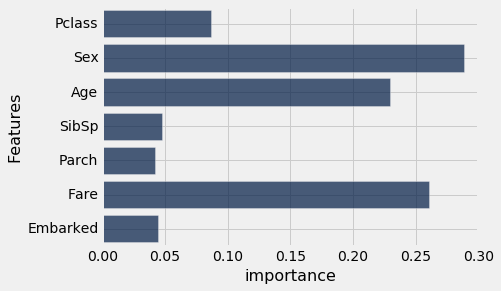

In [7]:
t1 = Table().with_columns([
        "Features", predictors,
        "importance", forest.feature_importances_
        ])
t1.barh("Features")

#### Feature Engineering 

In [8]:
train_data["Family_size"] = (train_data["SibSp"] + train_data['Parch'] + 1)**2
test_data["Family_size"] = (test_data["SibSp"] + test_data['Parch'] + 1)**2

In [9]:
train_data["PA"] = train_data['Pclass'] * train_data["Age"]
test_data["PA"] = test_data['Pclass'] * test_data["Age"]

In [10]:
forest2 = RandomForestClassifier(n_estimators=250,random_state=0)
forest2.fit(train_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Family_size","Embarked", "PA"]],\
           train['Survived'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

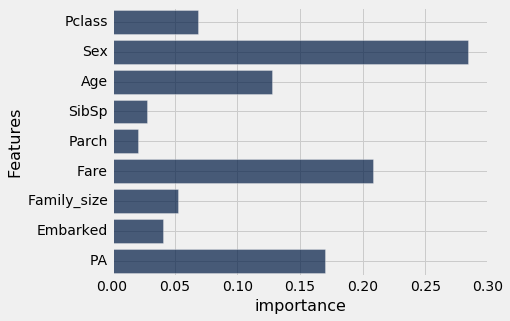

In [12]:
t2 = Table().with_columns([
        "Features", ["Pclass","Sex","Age","SibSp","Parch","Fare","Family_size","Embarked","PA"],
        "importance", forest2.feature_importances_
        ])
t2.barh("Features")

In [13]:
forest.feature_importances_

array([ 0.08668778,  0.28893571,  0.22980227,  0.04774943,  0.04169329,
        0.26060833,  0.04452318])

In [14]:
predictors2 = [ "Pclass","Sex", "Age", "Fare", "PA","Family_size"]

#### Fit random forest on the newly selected features

In [17]:
rf2 = RandomForestClassifier(max_depth=5)
param_grid_update = {"n_estimators": [10, 30, 100], "max_features": [1,2,3,4,5,6]}
clf2 = GridSearchCV(rf2, param_grid=param_grid_update,scoring='accuracy',cv=10)
clf2.fit(train_data[predictors2],train['Survived'])
estimator2 = clf2.best_estimator_
estimator2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
estimator2.fit(train_data[predictors2],train['Survived'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
predictions2 = estimator2.predict(test_data[predictors2])

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions2
    })
    
submission.to_csv('titanic_RF7.csv', index=False)

#### Accuracy with new features was 0.80597, did not improve.